In [1]:
from tardis.io.config_reader import Configuration
from tardis.simulation import Simulation
from tardis.io import config_reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

[py.warnings         ][WARNING]  /home/nilesh/anaconda3/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)
[py.warnings         ][WARNING]  /home/nilesh/anaconda3/envs/tardis3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
 (warnings.py:99)


In [2]:
tardis_config = Configuration.from_yaml('tardis_example.yml')
simulation = Simulation.from_config(tardis_config)

[py.warnings         ][WARNING]  /home/nilesh/anaconda3/envs/tardis3/lib/python3.6/site-packages/astropy/units/quantity.py:1067: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError.
  AstropyDeprecationWarning)
 (warnings.py:99)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:77)
[py.warnings         ][WARNING]  /home/nilesh/anaconda3/envs/tardis3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3209: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (yield from self.run_code(code, result)):
 (warnings.py:99)
[tardis.io.atomic    ][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (atomic.py:173)
[tardis.io.atomic    ][INFO   ]  Non provided atomic data: synpp_refs, ion_cx_th_data, ion_cx_sp_data (atomic.py:176)
[py.warnings         ][WARNING]  /home/nilesh/De

In [3]:
def get_virtual_spectrum():
    with warnings.catch_warnings(record=True) as w:
        spectrum = simulation.runner.spectrum_virtual

        if len(w) > 0 and w[-1]._category_name == 'UserWarning':
            warnings.warn(
                    'Virtual spectrum is not available, using the '
                    'real packet spectrum instead.')
            spectrum = simulation.runner.spectrum
    return spectrum

print('Saving the {} spectrum.'.format(tardis_config.spectrum.method))

Saving the virtual spectrum.


In [4]:
get_spectrum = {
        'real': lambda: simulation.runner.spectrum,
        'virtual': get_virtual_spectrum,
        'integrated': lambda: simulation.runner.spectrum_integrated,
        }[tardis_config.spectrum.method]

In [5]:
simulation.run()

[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915e+42 erg / s Luminosity absorbed = 2.63370e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	             t_rad    next_t_rad         w    next_w
	Shell                                               
	0      9926.501965  10171.209103  0.400392  0.500372
	5      9852.611678  10306.111379  0.211205  0.191331
	10     9779.813302  10174.379204  0.142695  0.116864
	15     9708.082813   9910.442275  0.104556  0.085962

 (base.py:348)
[tardis.simulation.base][INFO   ]  t_inner 9933.952 K -- next t_inner 11453.040 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 2/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.40398e+43 erg / s Luminosity absorbed = 4.68639e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.si

[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Luminosity absorbed = 2.82804e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:357)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      11427.410445  10741.337822  0.500788  0.439938
	5      11612.349822  11230.515356  0.193129  0.153637
	10     11373.245169  10870.696315  0.121622  0.101050
	15     11047.955461  10538.170159  0.090937  0.074680

 (base.py:348)
[tardis.simulation.base][INFO   ]  t_inner 10164.432 K -- next t_inner 11157.711 K (base.py:350)
[tardis.simulation.base][INFO   ]  Starting iteration 12/20 (base.py:266)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.27128e+43 erg / s Lum

In [6]:
ret_object = get_spectrum()

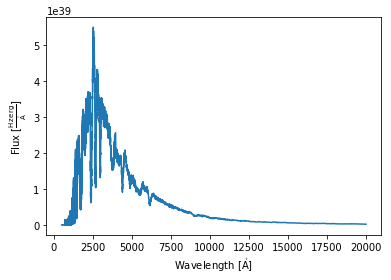

In [7]:
ret_object.plot()